In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import yfinance as yf
import datetime as dt


In [5]:
# Lấy dữ liệu giá cổ phiếu Apple từ Yahoo Finance
company = 'AAPL'
end_train = "2022-01-01"
start_test = end_train
start="2010-01-01"
data = yf.download(company, start= start, end=end_train)
data =data.reset_index()
data

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487535,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498751,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395380,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383555,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425994,447610800
...,...,...,...,...,...,...,...
3016,2021-12-27,177.089996,180.419998,177.070007,180.330002,178.527756,74919600
3017,2021-12-28,180.160004,181.330002,178.529999,179.289993,177.498154,79144300
3018,2021-12-29,179.330002,180.630005,178.139999,179.380005,177.587265,62348900
3019,2021-12-30,179.470001,180.570007,178.089996,178.199997,176.419067,59773000


<function matplotlib.pyplot.show(close=None, block=None)>

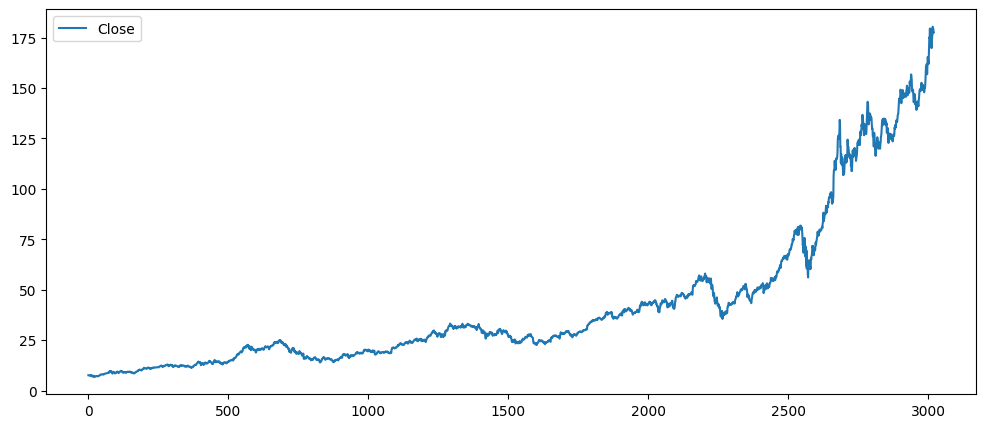

In [6]:

data['Close'].plot(figsize=(12,5))
plt.legend()
plt.show

In [7]:
# Lấy cột Close làm dữ liệu đầu vào
data = data['Close'].values.reshape(-1, 1)

# Chia dữ liệu thành tập train và tập test
train_data = data[:len(data)]
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
train_data_norm = scaler.fit_transform(train_data)
# Xác định số lượng ngày quan sát trong quá khứ
look_back = 4

# Tạo dữ liệu cho quá trình huấn luyện
X_train = []
y_train = []
for i in range(look_back, len(train_data_norm)):
    X_train.append(train_data_norm[i-look_back:i, 0])
    y_train.append(train_data_norm[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshape dữ liệu cho phù hợp với đầu vào của LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [8]:
# Xây dựng mô hình LSTM
unit = 210
Dp =  0.07
model = Sequential()
model.add(LSTM(units=unit, return_sequences = True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(Dp))
model.add(LSTM(units = unit, return_sequences = True))
model.add(Dropout(Dp))
model.add(LSTM(units = unit, return_sequences = True))
model.add(Dropout(Dp))
model.add(LSTM(units = unit, return_sequences = True))
model.add(Dropout(Dp))
model.add(LSTM(units = unit, return_sequences = True))
model.add(Dropout(Dp))
model.add(LSTM(units = unit))
model.add(Dropout(Dp))
model.add(Dense(units = 1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
95/95 [==============================] - 18s 51ms/step - loss: 0.0121
Epoch 2/50
95/95 [==============================] - 4s 43ms/step - loss: 4.1780e-04
Epoch 3/50
95/95 [==============================] - 4s 38ms/step - loss: 5.8656e-04
Epoch 4/50
95/95 [==============================] - 3s 36ms/step - loss: 4.3823e-04
Epoch 5/50
95/95 [==============================] - 4s 39ms/step - loss: 3.5646e-04
Epoch 6/50
95/95 [==============================] - 4s 37ms/step - loss: 5.5692e-04
Epoch 7/50
95/95 [==============================] - 3s 37ms/step - loss: 5.7563e-04
Epoch 8/50
95/95 [==============================] - 3s 37ms/step - loss: 2.8707e-04
Epoch 9/50
95/95 [==============================] - 3s 37ms/step - loss: 3.2065e-04
Epoch 10/50
95/95 [==============================] - 3s 36ms/step - loss: 4.0787e-04
Epoch 11/50
95/95 [==============================] - 4s 39ms/step - loss: 2.9908e-04
Epoch 12/50
95/95 [==============================] - 4s 38ms/step - loss: 2.8

In [9]:
end = "2023-09-01"
datas = yf.download(company, start, end)
# Lấy cột Adj Close làm dữ liệu đầu vào
data_test = datas['Close'].values.reshape(-1, 1)
data_test = data_test[len(data) - look_back:]
test_data_norm = scaler.fit_transform(data_test)
# Tạo dữ liệu cho quá trình huấn luyện
X_test = []
y_test = []
for i in range(look_back, len(test_data_norm)):
    X_test.append(test_data_norm[i-look_back:i, 0])
    y_test.append(test_data_norm[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
# Reshape dữ liệu cho phù hợp với đầu vào của LSTM
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

[*********************100%%**********************]  1 of 1 completed


In [10]:
data_predict = datas[int(len(datas))-look_back:]
data_predict = np.array(data_predict)
# tính toán

In [11]:
# data_predict

In [12]:
next_day_norm = model.predict(X_test)
y_predict = scaler.inverse_transform(next_day_norm)
# chuyển về dữ liệu thực

14/14 [==============================] - 3s 14ms/step


In [13]:
y_predict = y_predict.flatten()
# lấy giá trị trung bình của kết quả dụ đoán /trung bình là 10/ngày

In [14]:
# tạo 1 cái data giữa giá trị thực tế và giá trị dự đoán
df_predict = pd.DataFrame(y_predict)
df_predict.columns = ['y_predict']
y = datas['Close'].values.reshape(-1, 1)
y = y[len(data):]
y = pd.DataFrame(y)
y.columns = ['THUC TE']
df_test = pd.concat([df_predict, y], axis = 1)
# xuất data 
df_test 

,y_predict,THUC TE
0,181.707123,182.009995
1,181.909424,179.699997
2,182.092239,174.919998
3,181.922791,172.000000
4,180.973373,172.169998
...,...,...
413,180.595230,178.610001
414,181.336075,180.190002
415,181.863113,184.119995
416,182.101242,187.649994


<function matplotlib.pyplot.show(close=None, block=None)>

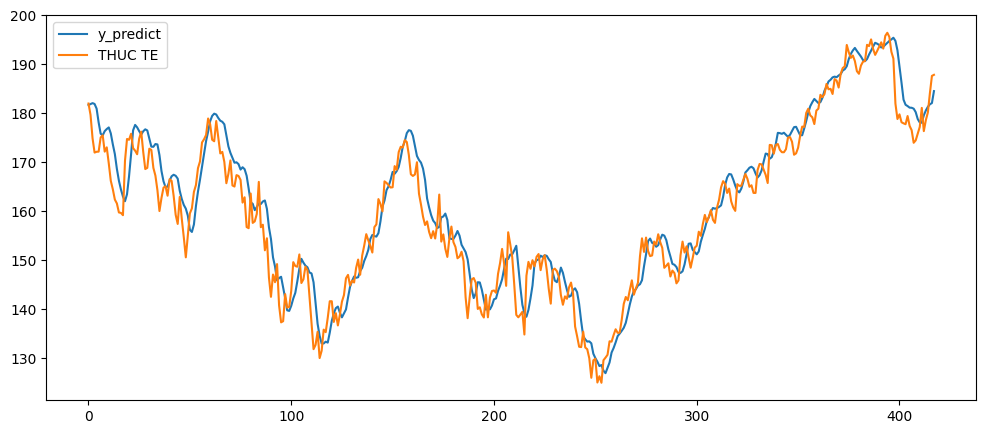

In [15]:
df_test['y_predict'].plot(figsize=(12,5))
df_test['THUC TE'].plot()
plt.legend()
plt.show

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
duDoan = df_test['y_predict'].values
thucTe = df_test['THUC TE'].values
# tạo biến để tính toán phương sai và độ lệch chuẩn cùng tính toán hiệu xuất mô hình

In [17]:
mse = mean_squared_error(duDoan, thucTe)
mae = mean_absolute_error(duDoan, thucTe)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 21.421340362163278
Mean Absolute Error: 3.648508135781904


In [18]:
# labelexcel = ['mse', 'mae', 'sum_cv_thuc', 'sum_cv_predict']

In [19]:
r2 = r2_score(duDoan, thucTe)
r2 = "{:.4f}".format(r2)
print("R2 Score:", r2)
# tính toán hiệu xuất mô hình 

R2 Score: 0.9255
